In [2]:
import awkward as ak
import uproot 
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import pandas as pd
hep.style.use("CMS")

In [3]:
output_dir = "/eos/home-g/gallim/www/plots/Hgg/NanoMicroCompare"

In [4]:
nanoaod_files_dir = "/work/gallim/devel/HiggsDNA_studies/out/test/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8"
nanoaod_arr = ak.from_parquet(nanoaod_files_dir)

In [5]:
nanoaod_arr

<Array [{lead_charge: 0, ... run: 1}] type='1069204 * {"lead_charge": ?int32, "l...'>

In [6]:
microaod_files_dir = "/pnfs/psi.ch/cms/trivcat/store/user/gallim/root_files/nanoaod_comparison_tnp_vars"
microaod_arr = uproot.concatenate(["{}/*.root:diphotonDumper/trees/ggH_125_13TeV_All_$SYST".format(microaod_files_dir)])

In [7]:
microaod_arr

<Array [{candidate_id: 0, ... puweight: 1}] type='1019840 * {"candidate_id": int...'>

In [8]:
# Temporary: consider barrel only
nanoaod_arr["lead_mvaID_recomputed"] = 2. / (1. + np.exp(-2 * (nanoaod_arr.lead_mvaID_recomputed + 1.0))) - 1.
nanoaod_arr["sublead_mvaID_recomputed"] = 2. / (1. + np.exp(-2 * (nanoaod_arr.sublead_mvaID_recomputed + 1.0))) - 1.

nanoaod_arr = nanoaod_arr[np.abs(nanoaod_arr.eta) < 1.5]
microaod_arr = microaod_arr[np.abs(microaod_arr.eta) < 1.5]

In [9]:
min_events = min(len(nanoaod_arr), len(microaod_arr))

In [10]:
columns = [
    {
        "nano_col": "mass",
        "micro_col": "mass",
        "bins": 100,
        "range": (100, 140),
        "var": "$m_{H}$"
    },
    {
        "nano_col": "lead_mvaID",
        "micro_col": "lead_mva",
        "bins": 100,
        "range": (0, 1),
        "var": "lead PhoIdMVA"
    },
    {
        "nano_col": "sublead_mvaID",
        "micro_col": "sublead_mva",
        "bins": 100,
        "range": (0, 1),
        "var": "sublead PhoIdMVA"
    },
    {
        "nano_col": "lead_mvaID_recomputed",
        "micro_col": "lead_mva",
        "bins": 100,
        "range": (0, 1),
        "var": "lead PhoIdMVA (reco)"
    },
    {
        "nano_col": "sublead_mvaID_recomputed",
        "micro_col": "sublead_mva",
        "bins": 100,
        "range": (0, 1),
        "var": "sublead PhoIdMVA (reco)"
    },
    {
        "nano_col": "lead_pt",
        "micro_col": "leadPt",
        "bins": 100,
        "range": (0, 200),
        "var": "lead $p_{t}$"
    },
    {
        "nano_col": "sublead_pt",
        "micro_col": "subleadPt",
        "bins": 100,
        "range": (0, 200),
        "var": "sublead $p_{t}$"
    },
    {
        "nano_col": "eta",
        "micro_col": "eta",
        "bins": 100,
        "range": (-3, 3),
        "var": "$\eta$"
    },
    {
        "nano_col": "lead_eta",
        "micro_col": "lead_eta",
        "bins": 100,
        "range": (-3, 3),
        "var": "lead $\eta$"
    },
    {
        "nano_col": "sublead_eta",
        "micro_col": "sublead_eta",
        "bins": 100,
        "range": (-3, 3),
        "var": "sublead $\eta$"
    },
    {
        "nano_col": "lead_phi",
        "micro_col": "lead_phi",
        "bins": 100,
        "range": (-3, 3),
        "var": "lead $\phi$"
    },
    {
        "nano_col": "sublead_phi",
        "micro_col": "sublead_phi",
        "bins": 100,
        "range": (-3, 3),
        "var": "sublead $\phi$"
    },
    {
        "nano_col": "lead_pfPhoIso03",
        "micro_col": "lead_pho_iso",
        "bins": 100,
        "range": (0, 1),
        "var": "Lead Photon Iso"
    },
    {
        "nano_col": "lead_r9",
        "micro_col": "lead_r9",
        "bins": 100,
        "range": (0.4, 1.1),
        "var": "Lead R9"
    },
    {
        "nano_col": "lead_s4",
        "micro_col": "lead_s4",
        "bins": 100,
        "range": (0.4, 1),
        "var": "Lead S4"
    },
    {
        "nano_col": "lead_sieip",
        "micro_col": "lead_sieip",
        "bins": 100,
        "range": (-0.0005, 0.0005),
        "var": "$\sigma_{ieip}$"
    },
    {
        "nano_col": "lead_phiWidth",
        "micro_col": "lead_phi_width_sc",
        "bins": 100,
        "range": (0, 0.1),
        "var": "$\phi_{width}$"
    },
    {
        "nano_col": "lead_etaWidth",
        "micro_col": "lead_eta_width_sc",
        "bins": 100,
        "range": (0, 0.04),
        "var": "$\eta_{width}$"
    },
]

mass
nano: 411723.0
micro: 412062.0
diff = 339.0
rel diff = 0.08226917308560362%
lead_mvaID
nano: 391049.0
micro: 401301.0
diff = 10252.0
rel diff = 2.554690867951986%
sublead_mvaID
nano: 382070.0
micro: 393827.0
diff = 11757.0
rel diff = 2.985320965804782%
lead_mvaID_recomputed
nano: 409278.0
micro: 401287.0
diff = 7991.0
rel diff = 1.9524626293130831%
sublead_mvaID_recomputed
nano: 403886.0
micro: 393457.0
diff = 10429.0
rel diff = 2.5821642740773387%
lead_pt
nano: 399266.0
micro: 399491.0
diff = 225.0
rel diff = 0.05632166932421506%
sublead_pt
nano: 413461.0
micro: 413498.0
diff = 37.0
rel diff = 0.008948048116314953%
eta
nano: 414499.0
micro: 414499.0
diff = 0.0
rel diff = 0.0%
lead_eta
nano: 414499.0
micro: 414499.0
diff = 0.0
rel diff = 0.0%
sublead_eta
nano: 414499.0
micro: 414499.0
diff = 0.0
rel diff = 0.0%
lead_phi
nano: 395782.0
micro: 396165.0
diff = 383.0
rel diff = 0.09667688967980513%
sublead_phi
nano: 395898.0
micro: 395930.0
diff = 32.0
rel diff = 0.00808223675902306%


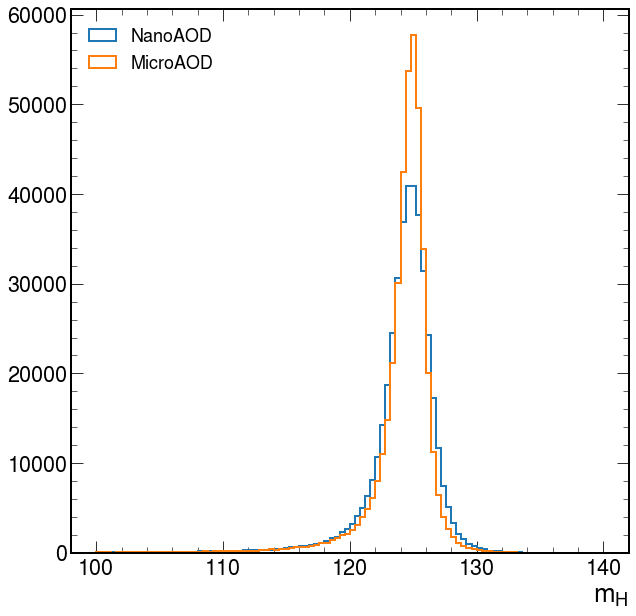

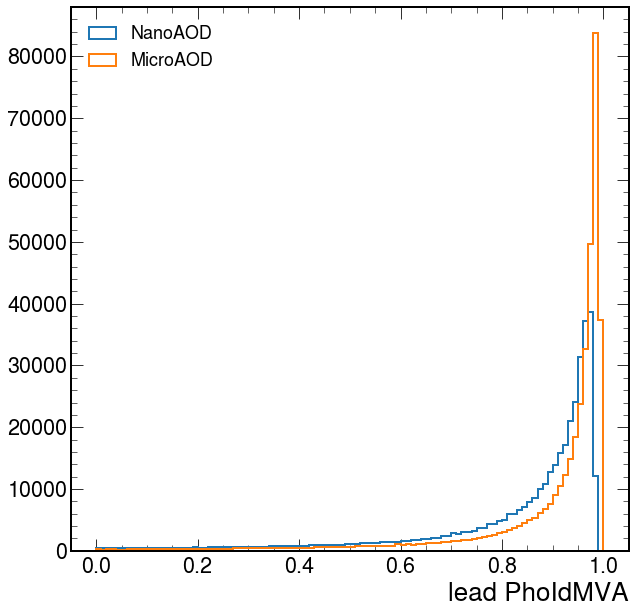

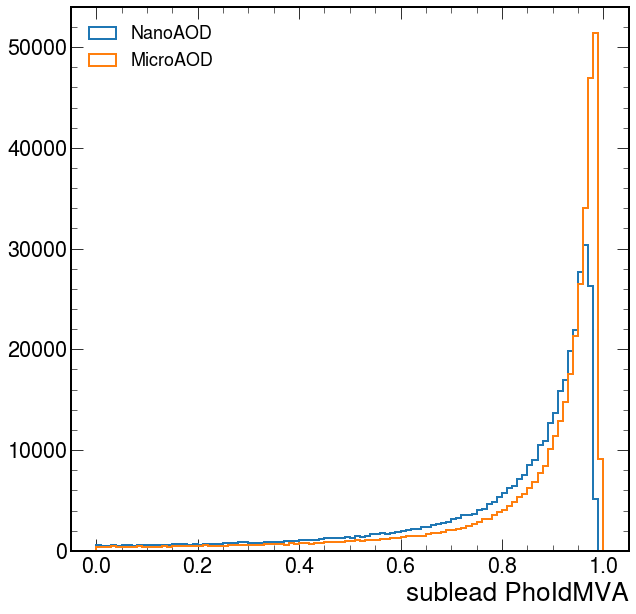

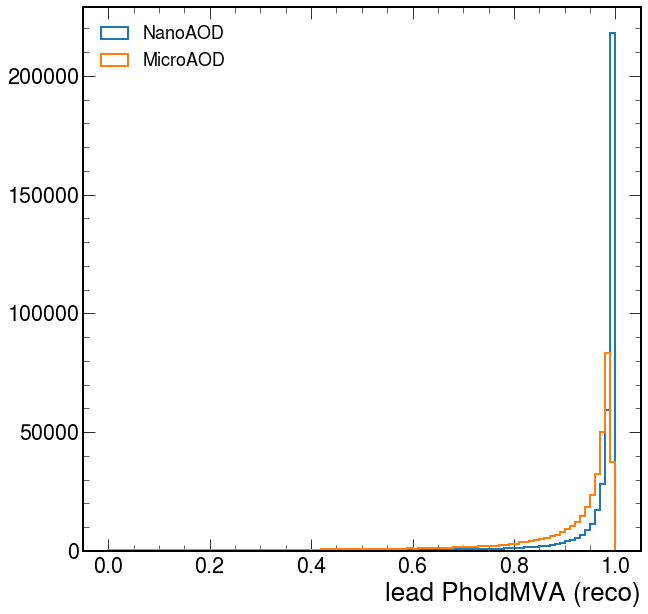

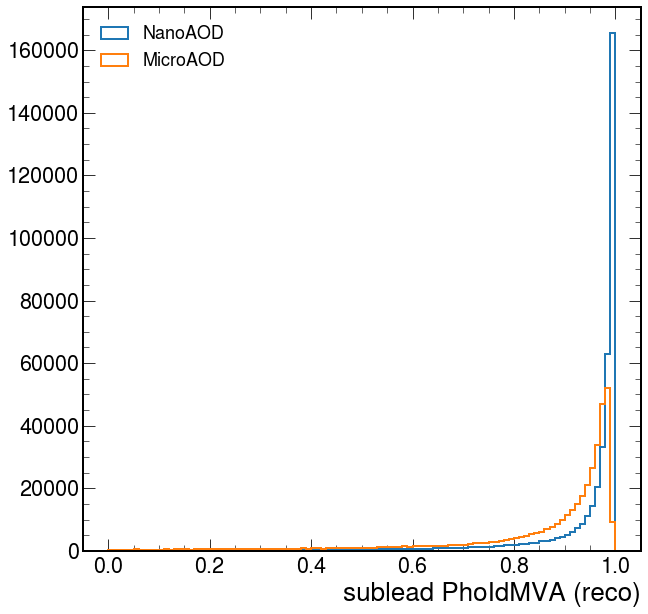

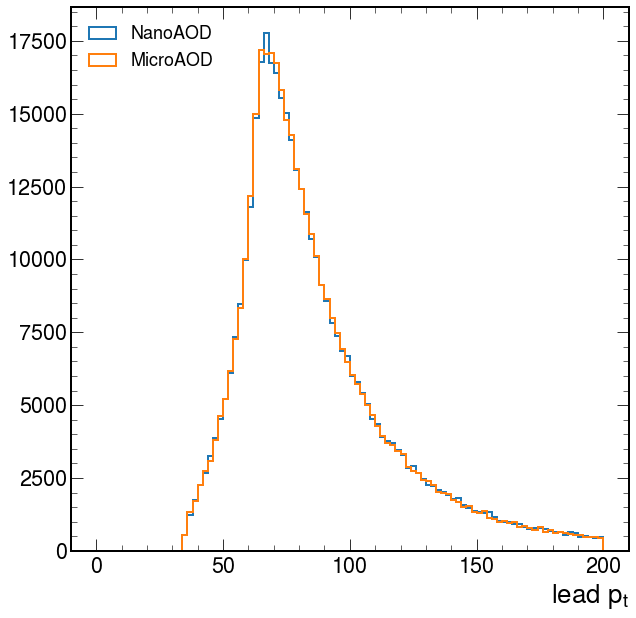

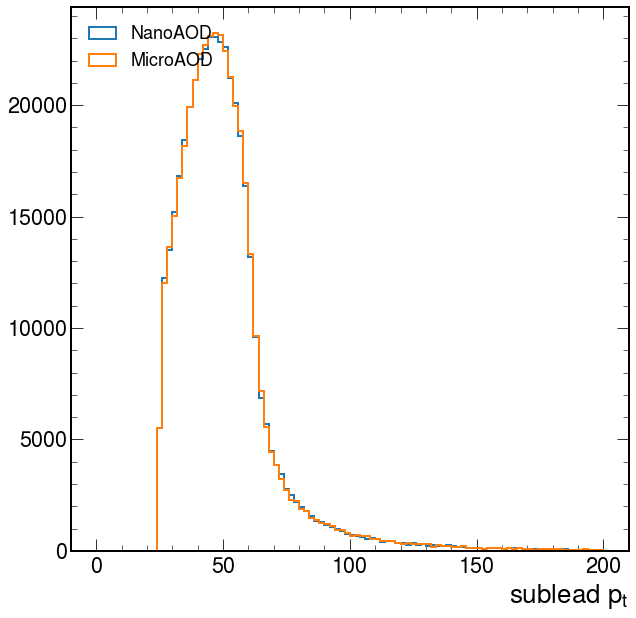

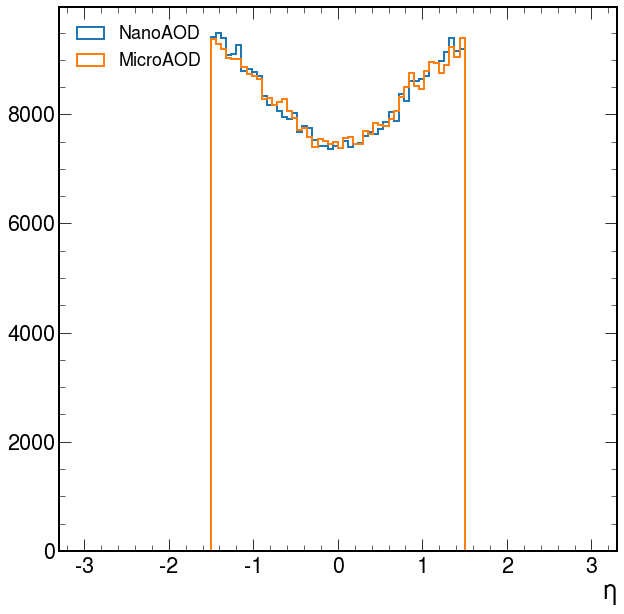

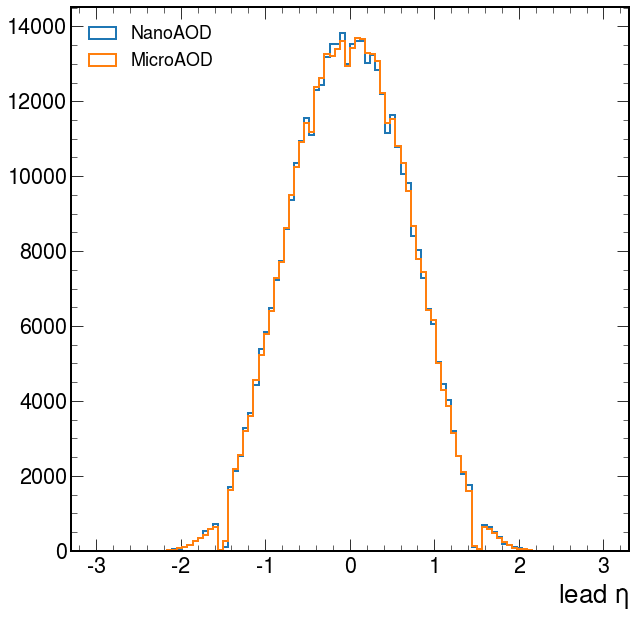

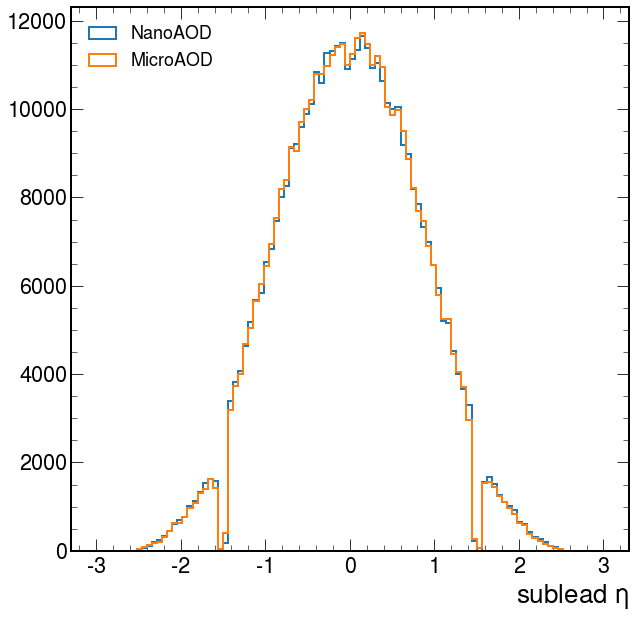

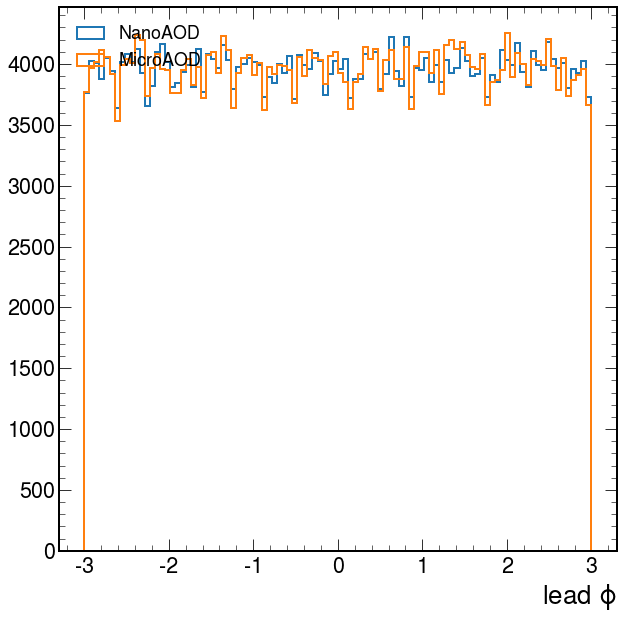

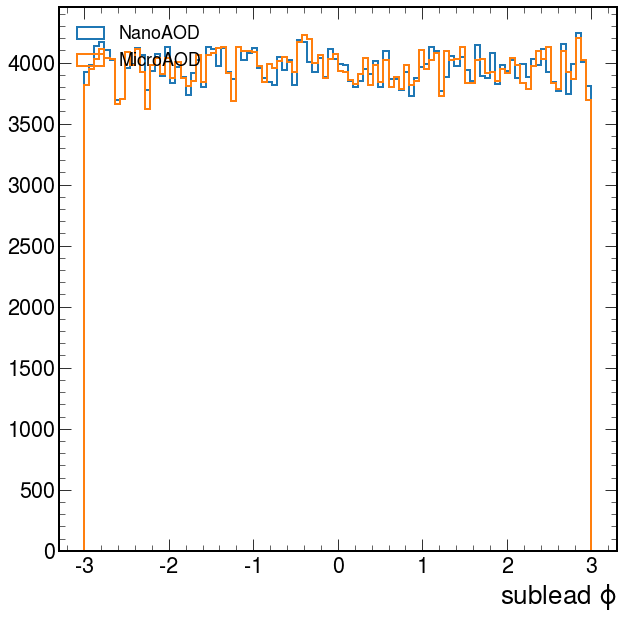

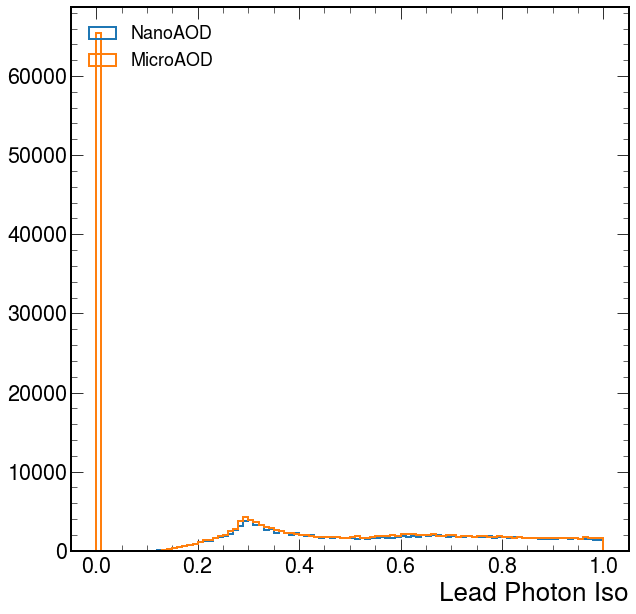

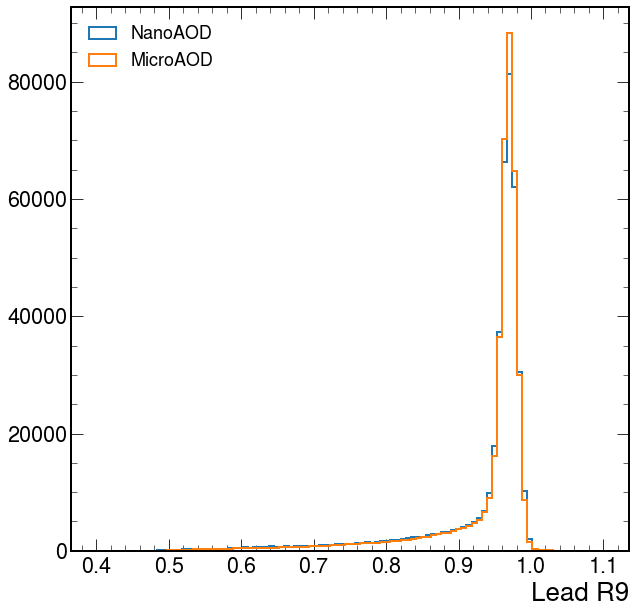

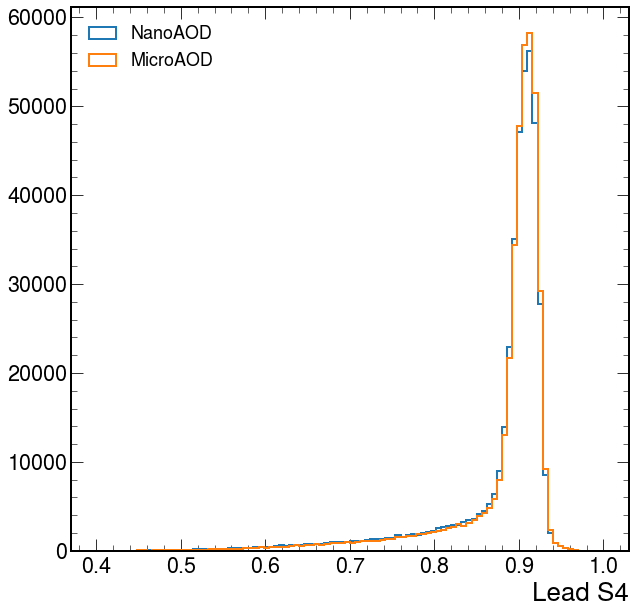

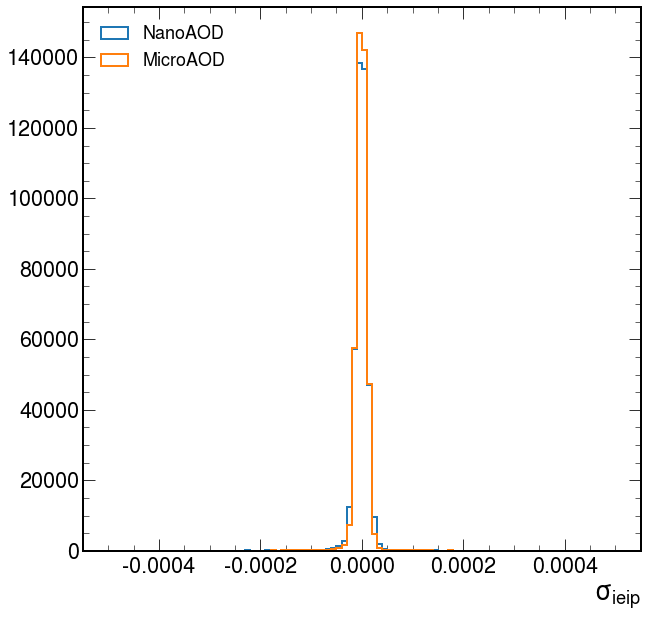

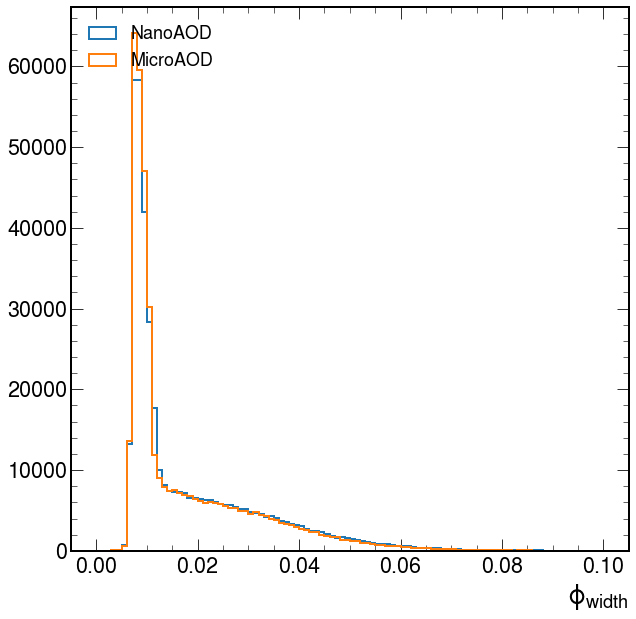

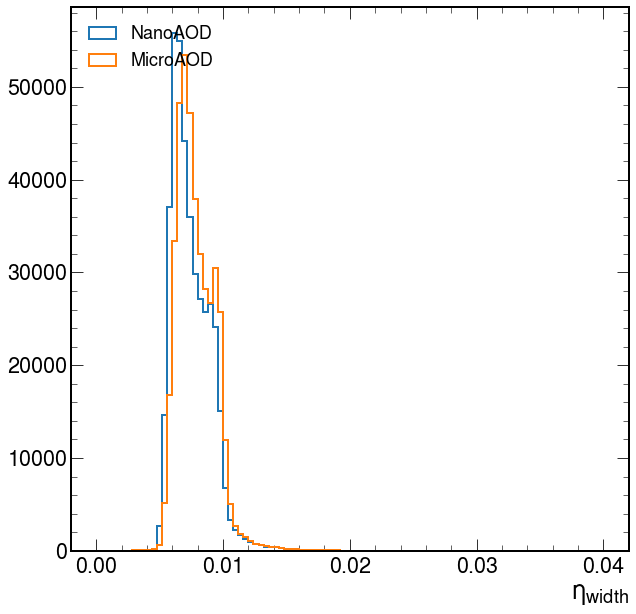

In [11]:
for column in columns:
    fig, ax = plt.subplots()
    
    nano_col = np.random.choice(nanoaod_arr[column["nano_col"]], min_events)
    micro_col = np.random.choice(microaod_arr[column["micro_col"]], min_events)
    
    n, n_, n__ = ax.hist(nano_col, bins=column["bins"], range=column["range"], histtype="step", label="NanoAOD", linewidth=2)
    m, m_, m__ = ax.hist(micro_col, bins=column["bins"], range=column["range"], histtype="step", label="MicroAOD", linewidth=2)
    
    ax.set_xlabel(column["var"])
    ax.legend(fontsize=18, loc="upper left")
    
    print(column["nano_col"])
    print("nano: {}".format(np.sum(n)))
    print("micro: {}".format(np.sum(m)))
    print("diff = {}".format(abs(np.sum(n) - np.sum(m))))
    print("rel diff = {}%".format(100 * abs(np.sum(n) - np.sum(m)) / max(np.sum(n), np.sum(m))))
    
    #fig.savefig("{}/{}.png".format(output_dir, column["nano_col"]), bbox_inches='tight')
    #fig.savefig("{}/{}.pdf".format(output_dir, column["nano_col"]), bbox_inches='tight')

## Event by Event

In [40]:
test_nano = nanoaod_arr[:min_events]
test_micro = microaod_arr[:min_events]

#test_nano = nanoaod_arr[:1000]
#test_micro = microaod_arr[:1000]

test_nano = ak.Array(
    {
    "event": test_nano["event"], 
    "lumi": test_nano["lumi"], 
    "lead_mvaID_recomputed": test_nano["lead_mvaID_recomputed"]
    }
)
test_micro = test_micro[["event", "lumi", "lead_mva"]]

pd_nano = ak.to_pandas(test_nano)
pd_micro = ak.to_pandas(test_micro)

In [41]:
pd_nano = pd_nano.set_index(["event", "lumi"])
pd_micro = pd_micro.set_index(["event", "lumi"])

In [45]:
pd_joined = pd_nano.join(pd_micro, lsuffix="_nano", rsuffix="_micro")
pd_joined = pd_joined[pd_joined["lead_mvaID_recomputed"].notna() & pd_joined["lead_mva"].notna()]

In [46]:
pd_joined

,,lead_mvaID_recomputed,lead_mva
event,lumi,,
312556,993,0.997934,0.979629
312545,993,0.997652,0.982366
312572,993,0.976413,0.914683
312489,993,0.997409,0.991527
312504,993,0.940426,0.863499
...,...,...,...
1393622,4425,0.529424,0.351062
1393656,4425,0.997596,0.987204
1393662,4425,0.995802,0.968673


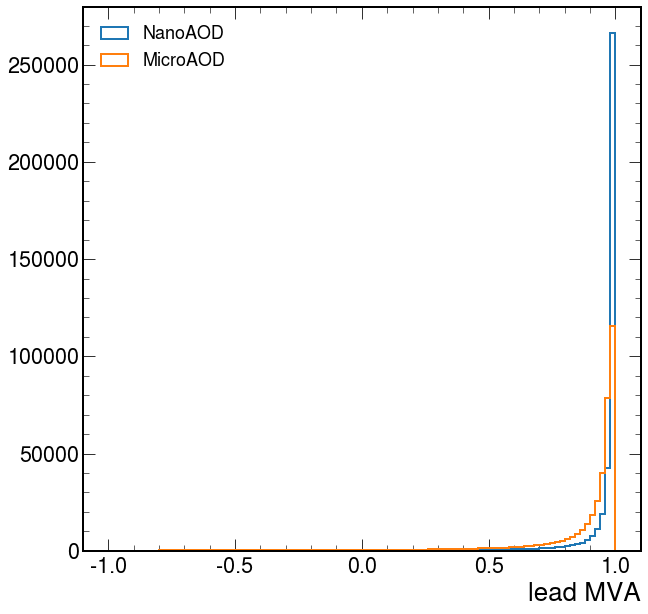

In [47]:
bins = 100
rng = (-1, 1)

fig, ax = plt.subplots()

n, n_, n__ = ax.hist(pd_joined["lead_mvaID_recomputed"], bins=bins, range=rng, histtype="step", label="NanoAOD", linewidth=2)
m, m_, m__ = ax.hist(pd_joined["lead_mva"], bins=bins, range=rng, histtype="step", label="MicroAOD", linewidth=2)

ax.set_xlabel("lead MVA")
ax.legend(fontsize=18, loc="upper left")